# 1. Expectation

## Expectation does not exist:  Cauchy Distribution

* Make a sample from a Cauchy distribution and compute the sample mean and median.

* `rcauchy` is an R function generating random numbers following the Cauchy distribution, characterized by heavy tails and undefined variance.
  * `rcauchy(n, location = 0, scale = 1)`
  * n = number of observations.

[1] 0.2299968

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-126.35498   -0.92926   -0.00312    0.23000    1.06256  134.79144 

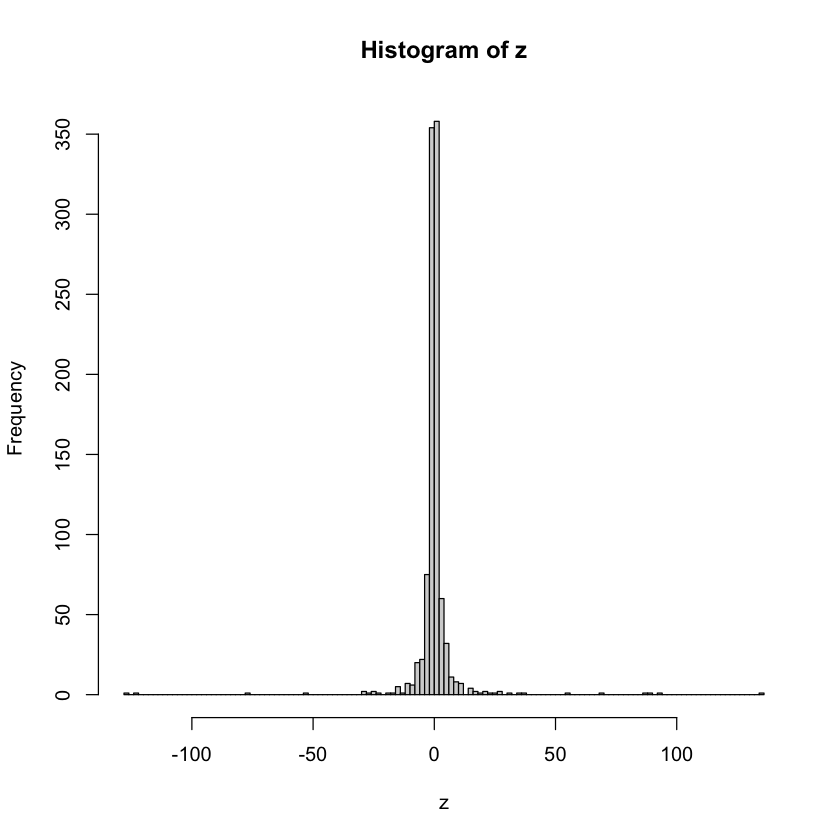

In [10]:
z<- rcauchy(1000)

#plot
hist(z,100)

# mean
mean(z)

# five number summary 
summary(z)

[1] 2.978556

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.083   2.636   2.988   2.979   3.307   4.322 

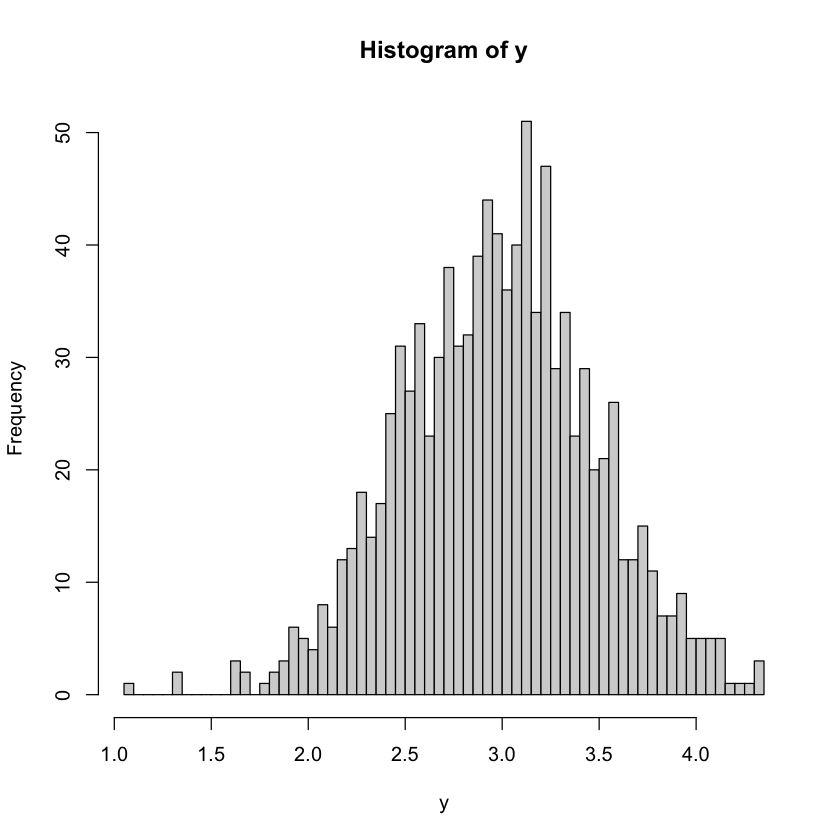

In [11]:
# change center and width (scale)
y<- rnorm(1000,3,.5)

#plot
hist(y,100)

# mean
mean(y)

# five number summary 
summary(y)


Make many means and medians.

In [12]:
x.1 <- replicate(1000,mean(rcauchy(10000)))
x.2 <- replicate(1000, median(rcauchy(10000)))

summary(x.1) #summary of mean
summary(x.2) #summary of median

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 -241.192    -0.972     0.101    15.015     1.099 15189.575 

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.0512579 -0.0108832 -0.0012841 -0.0006719  0.0103552  0.0544952 

Maybe the sample size is too small for computing the mean ?


Plot the ecdf of a suitable sample. 

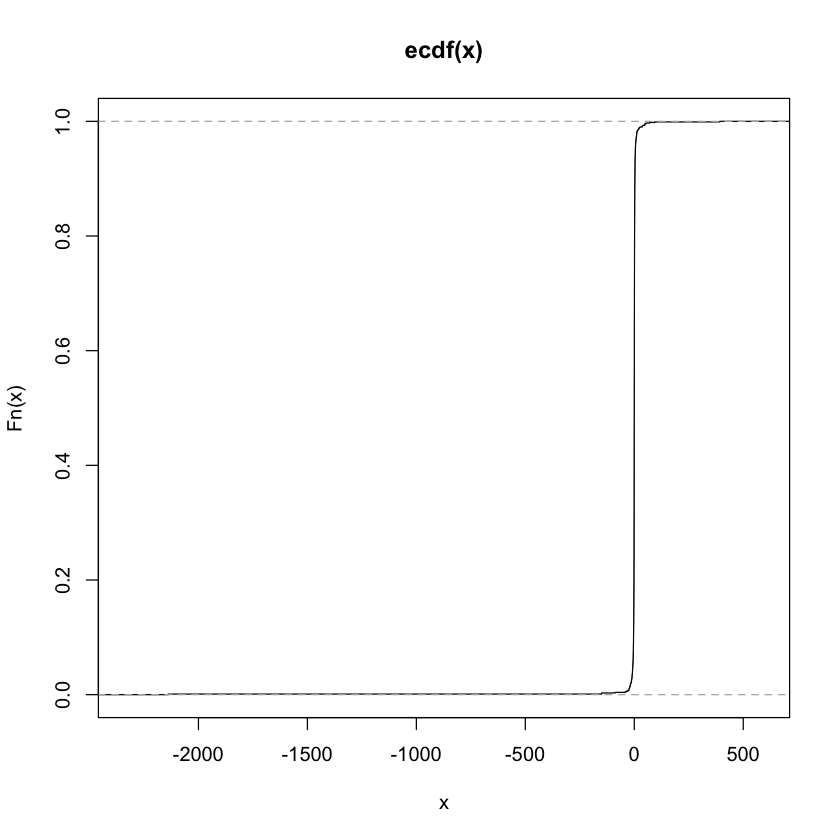

In [13]:
plot.ecdf(rcauchy(1000))

Standard deviation of a Cauchy rv DOES NOT EXIST

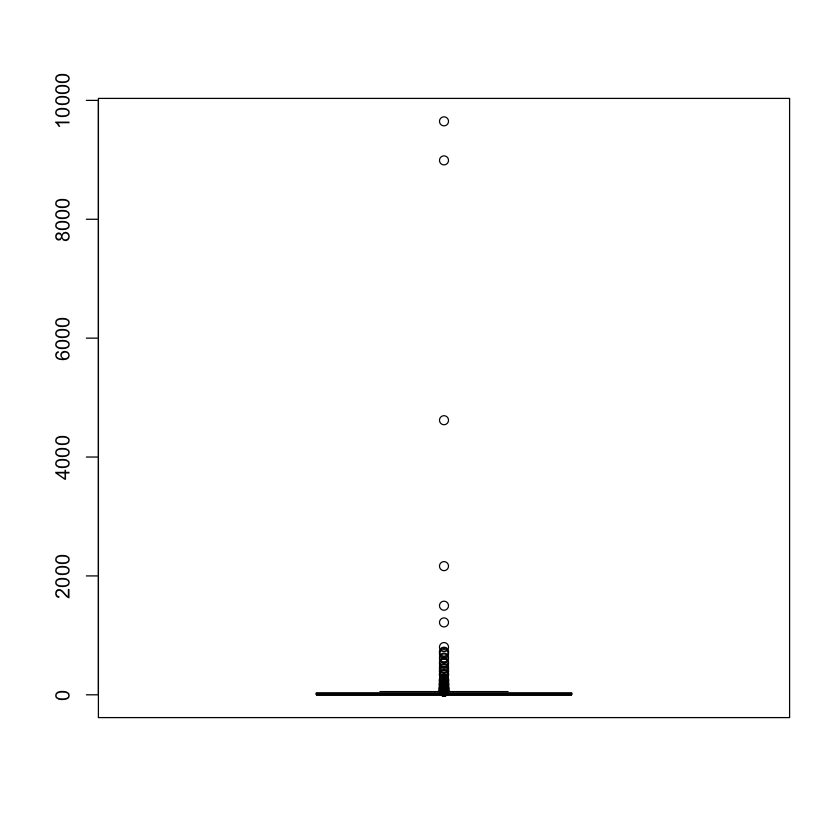

In [14]:
boxplot(replicate(1000, sd(rcauchy(100))))

# 2. Moments


## Example1: Second moment of a binomial random variable

In [15]:
n = 30
p = .4
sum((0:n)^2*dbinom(0:n,n,p)) # E(X^2) = sum(x^2 * P(X=x))

mean(rbinom(10000,n,p)^2)  # E(X^2)

[1] 151.2

[1] 151.0814

## Example 2: Third central moment of a Poisson random variable

In [16]:
lambda = 4
n = 50
my.mean <- sum((0:n)*dpois(0:n, lambda)) # mu =E(X)=sum(x*P(X=x))

my.mean

sum(((0:n) - my.mean)^3*dpois(0:n, lambda)) #E((X-mu)^3) = sum((x-mu)^3 * P(X=x))

mean((rpois(100000,lambda) - my.mean)^3) #E((X-mu)^3)

[1] 4

[1] 4

[1] 4.01542

## Example 3: Second central moment

a. Standard deviation of a binomial distribution

In [17]:
n = 30
p = .4
sqrt(n*p*(1-p))
sd(rbinom(10000,n,p))

[1] 2.683282

[1] 2.666341

b. Standard deviation of a normal distribution

In [18]:
my.mu = 1
my.sigma = 3.5
sd(rnorm(1000, my.mu, my.sigma))

sqrt(mean((rnorm(1000,my.mu, my.sigma) - my.mu)^2)) #E((X-mu)^2))

[1] 3.468826

[1] 3.479223

## Example 4: Moments package

The absolute moment of $M_n$ of a probability function $P(x)$ taken about a point $a$ is defined by

$$
M_n=\int|x-a|^n P(x) d x .
$$

In [19]:
library(moments)
x <- rnorm(100)

## Compute the mean
moment(x) # E(X)

## Compute the 2nd centeral moment (= var)
moment(x, order=2,central=TRUE)

## Compute the 3rd absolute centeral moment
moment(x, order=3, central=TRUE, absolute=TRUE)

[1] -0.03938419

[1] 1.104566

[1] 1.735338

# 3. Expected Value and Conditioning

![](images/2023-09-25-14-59-24.png)

<!-- 
Expected value and conditioning

We can also define and compute $E(X \mid B), \operatorname{var}(X \mid B)$ and so on.

Example

Suppose $X \sim U(0,1)$. What is $E(X \mid X \geq 1 / 3)$ ?

Answer: We can show that $Y=(X \mid X \geq 1 / 3)$ has a uniform distribution on $(1 / 3,1)$. The mean is therefore $E(X \mid X \geq 1 / 3)=\frac{2}{3}$. R Notebook
Example
Suppose $X \sim U(0,1)$. What is $\operatorname{var}(X \mid X \geq 1 / 3)$ ?
Answer: We know that $Y=(X \mid X \geq 1 / 3)$ has a uniform distribution on $(1 / 3,1)$. The variance is therefore (see Chihara Appendix B)
$$
\operatorname{var}(X \mid X \geq 1 / 3)=\frac{1}{12}\left(\frac{2}{3}\right)^2=\frac{1}{27}
$$ -->


a. Expected value of  $X | X > 1/3$ if $X \sim U(0,1)$

In [20]:
x <- runif(10000)
mean(x[x>1/3]) #by simulation
2/3 # theorotical

[1] 0.6627801

[1] 0.6666667

b. And the variance:

In [21]:
var(x[x>1/3])
1/27

[1] 0.03711504

[1] 0.03703704

c. Conditional Distribution $Y= X | X > 1/3$ if $X \sim U(0,1)$

In [22]:
x <- runif(1000)
y <- x[x>(1/3)]

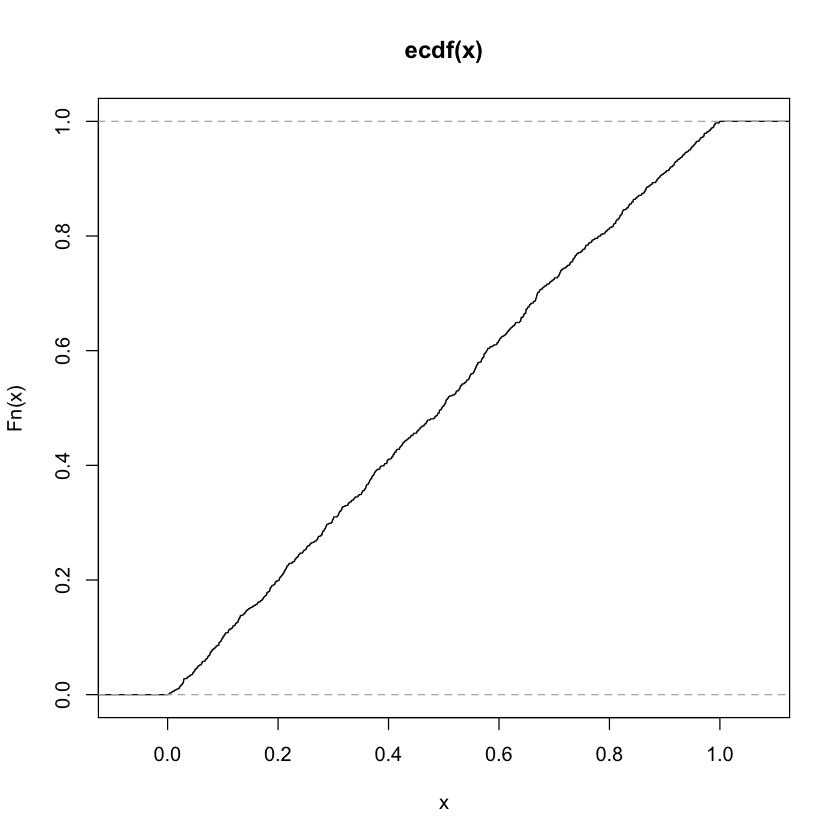

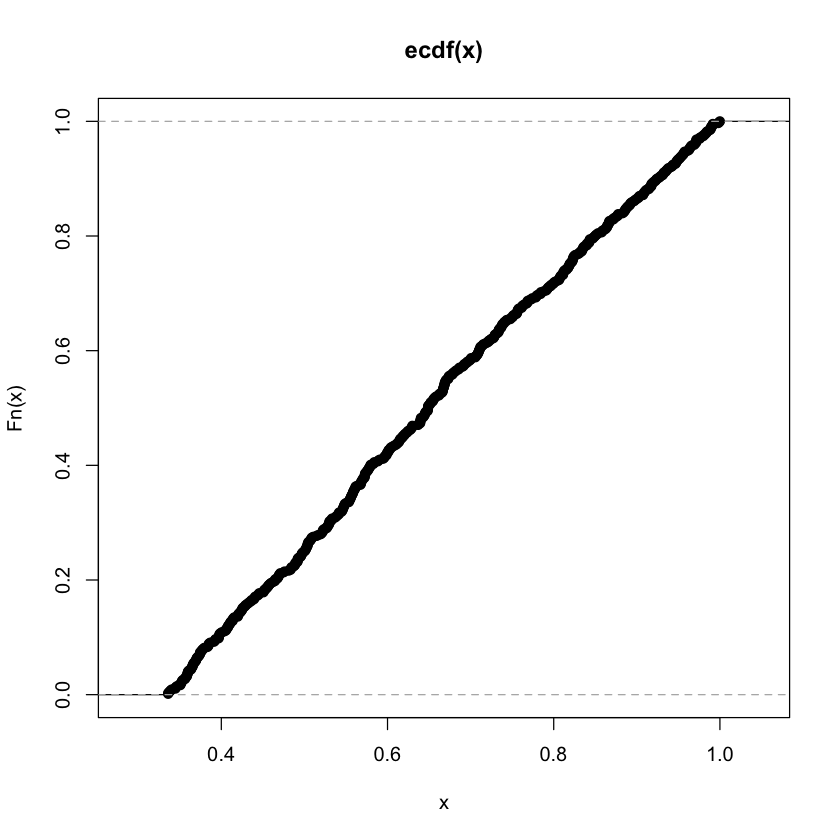

In [23]:
plot.ecdf(x)
plot.ecdf(y)

## Example 5: Mixed Distributions 

Let $X.0 \sim U(0,3)$, $X.1 \sim Poisson(4)$, and let $X = X.0 + X.1$

a. Make an empirical cdf of $X$

b. Make an empirical cdf of $X|X < 8$ in the same plot

c. Make an empirical cdf of $X.1|X<8$


In [24]:
N = 10000
X.0 <- runif(N,0,3)
X.1 <- rpois(N,4)
X <- X.0 + X.1

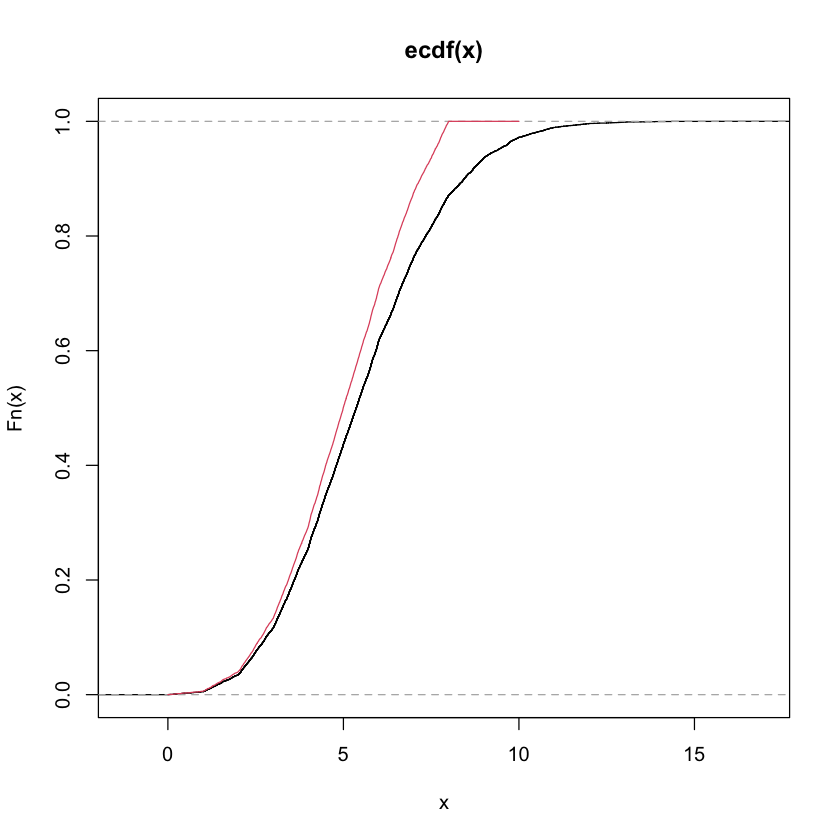

In [25]:
plot.ecdf(X)
X.2 <- X[X<8]
mycdf = ecdf(X.2)
t <- seq(0,10,by = .01)
lines(t,mycdf(t), col = 2)

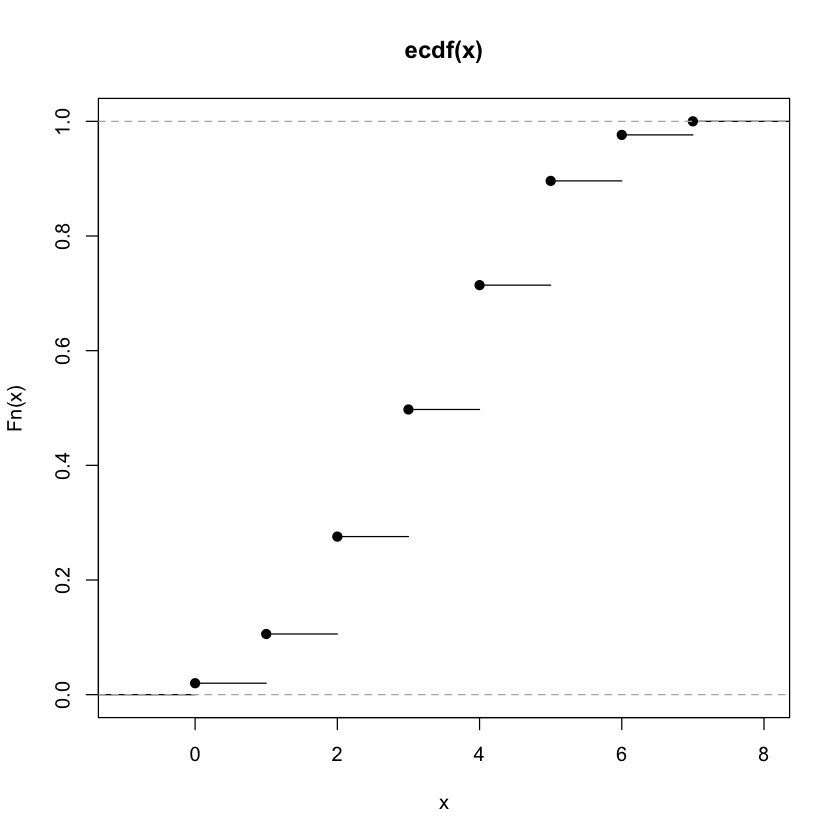

In [26]:
plot.ecdf(X.1[X<8])

# 4. Simulation of bivariate random variables

## Example 6: Joint Distribution

$X1 > 0$, $X2 > 0$, $X1 + X2 < 1$, uniform density = 2

### Also plot it 

,X1,X2
,<dbl>,<dbl>
2,0.04382482,0.55931317
5,0.24985572,0.37856509
8,0.33346714,0.52437539
12,0.70687474,0.02394005
15,0.45512059,0.06166735
19,0.41166683,0.15480003


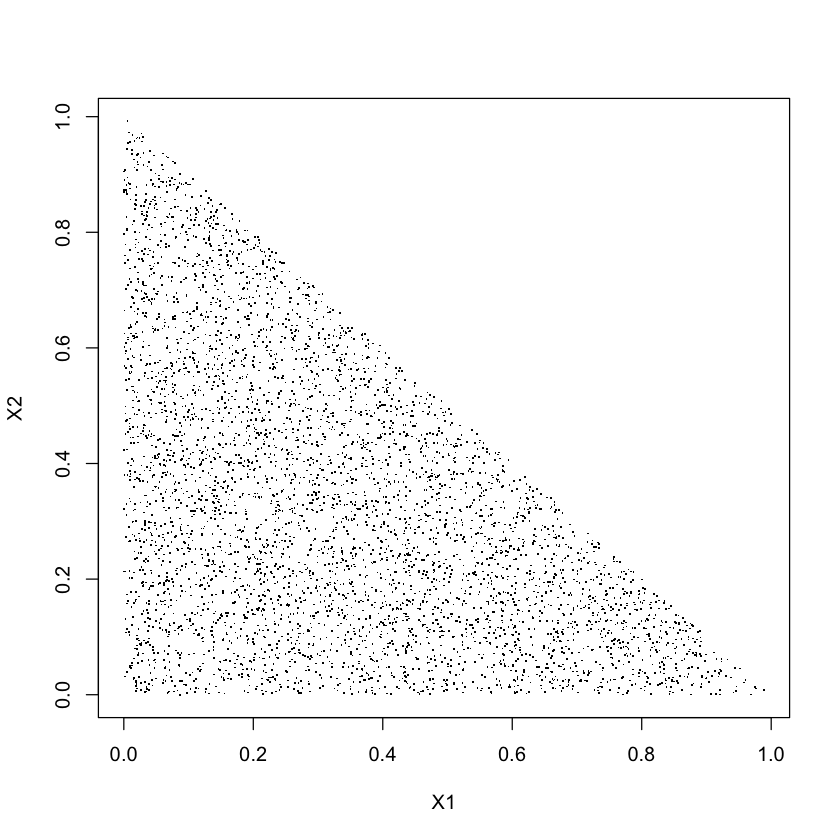

In [27]:
N = 10000  # number of initial simulation
set.seed(101)
mydf.0 <- data.frame(X1 = runif(N), X2 = runif(N))
mydf.0 <- mydf.0[rowSums(mydf.0) < 1,]
head(mydf.0)
plot(mydf.0, pch = 46)

## Example 7: to illustrate Law of  Total Probability 

![](images/2023-09-25-15-01-59.png)

a. First simulate large number of conditions $X \in A_j$. These occur as in a geometric distribution with p = 0.5.

_Because geometric p.m.f $=p(1-p)^{x-1}=(1/2)(1/2)^{j-1}=(1/2)^j$

In [28]:
n = 100000
A.1 <- rgeom(n,.5)
table(A.1)

A.1
    0     1     2     3     4     5     6     7     8     9    10    11    12 
49857 25097 12570  6243  3165  1507   800   378   202    78    48    28    12 
   13    14    15    16    17 
    6     2     2     3     2 

b. For each value j of this condition, simulate a uniform random variable in the interval $(j,j+1)$. Then make a histogram.

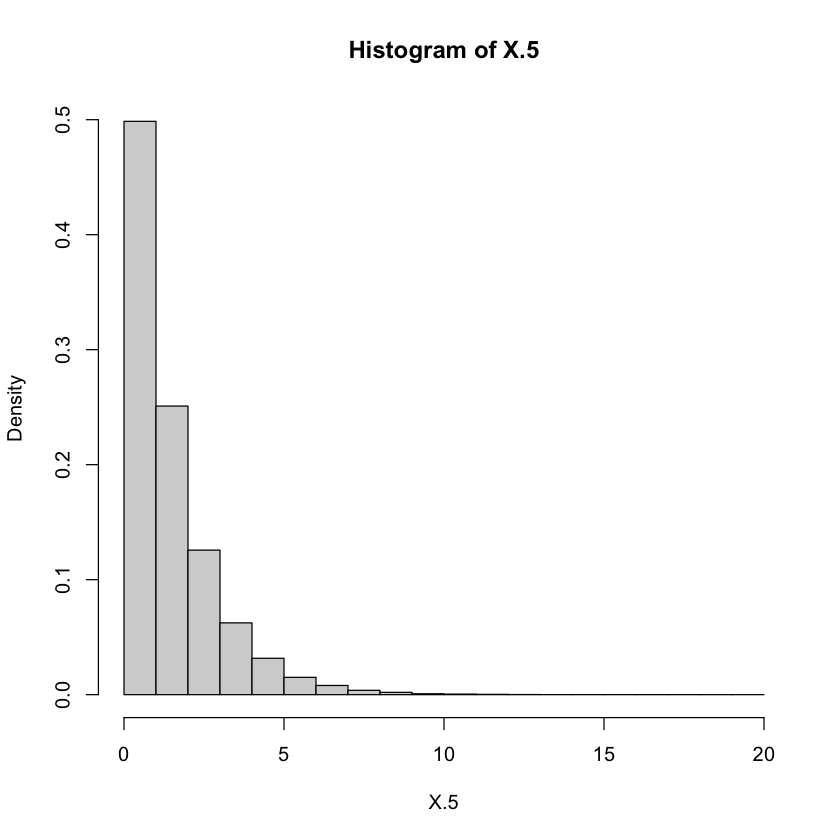

In [29]:
X.5 <- runif(n, min = A.1, max = A.1+1)
hist(X.5, prob = T, breaks =0:20)

c. Compute the sample mean:

In [30]:
mean(X.5)
3/2

[1] 1.499157

[1] 1.5

## Example 8: Numerical Example 

Suppose $(X,Y)$ have the joint pmf

$$
f_{XY}(1,1)= .1, \quad f_{XY}(1,2) = .2, \quad f_{XY}(2,1) = .1, \quad f_{XY}(2,2) = .6, 
$$

__Find the expectations of $X$ and $Y$__
$$
E(X) = 1.7, \quad E(Y) = 1.8 
$$

__Find the conditional distributions of $X$, conditioned on the possible values $y$ of $Y$:__

$$
\begin{aligned}
f_{X|Y}(1|Y=1) &= .5, \quad f_{X|Y}(2|Y=1) = .5\\
f_{X|Y}(1|Y=2) &= .25, \quad f_{X|Y}(2|Y=2) = .75\\
\end{aligned}
$$

__Conditional expectations_

$$
E(X|Y=1) = 1.5, E(X|Y=2) = 1.75
$$
__Formula for $E(X|Y)$__

$$
E(X|Y) = \begin{cases} 1.5 \quad \text{if} \; Y=1 \\
 1.75 \quad \text{if} \; Y=2
 \end{cases}
$$


# 5. Marginal distribution, continuous case.

## Example 9: 

Let $(U, V)$ be independent random variables, each with uniform distribution on $(0,1)$.

The joint density is

$$
f_{U V}(u, v)=\left\{\begin{array}{cc}
1 & (0<u, v<1) \\
0 & \text { otherwise }
\end{array}\right.
$$

Let $X=\min (U, V)$ and $Y=\max (U, V)$. One can show that the joint density of $(X, Y)$ is

$$
f_{X Y}(x, y)=\left\{\begin{array}{cc}
2 & (0<x \leq y<1) \\
0 & \text { otherwise }
\end{array}\right.
$$


a. Simulation of $(U,V)$


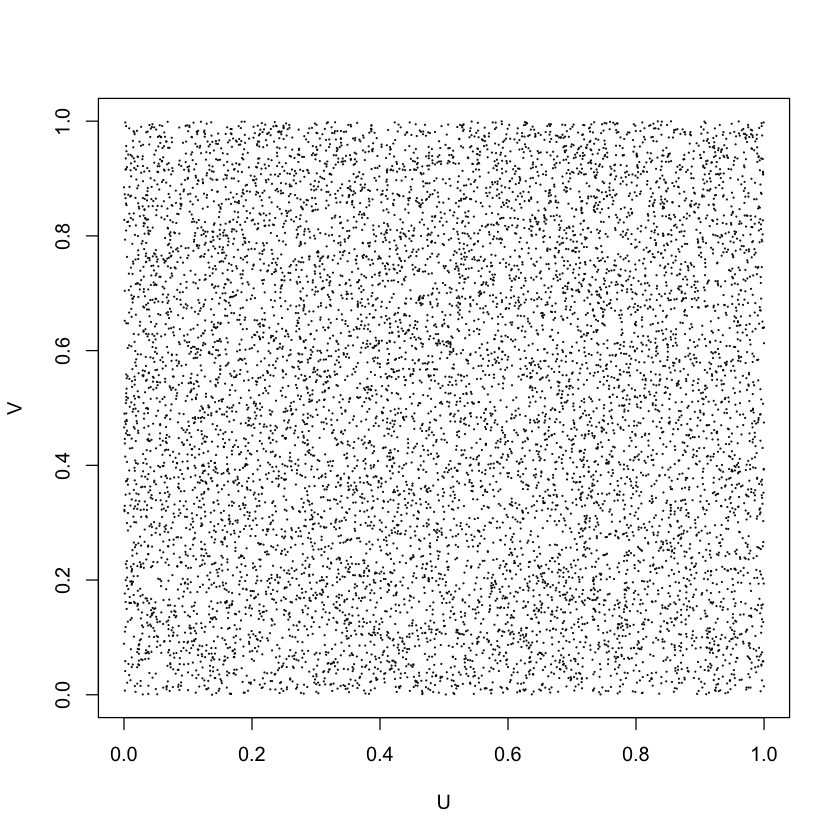

In [31]:
mydf.0 = data.frame(U = runif(10000), V = runif(10000))
plot(mydf.0,cex = .1)

b. Simulation of $(X,Y)$

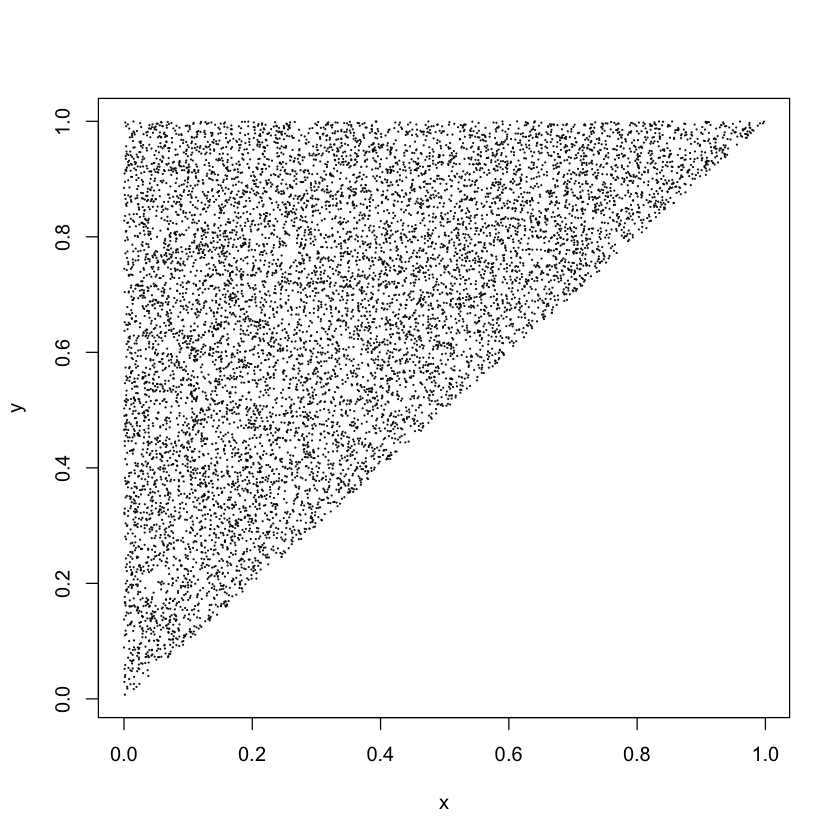

In [32]:
x = sapply(1:10000, function(j){min(mydf.0[j,])})
y = sapply(1:10000, function(j){max(mydf.0[j,])})

# Can also be done with apply()
mydf.1 = data.frame(x =x, y = y)
plot(mydf.1,pch = 1,cex = .1)

c. For the marginal distribution of X, just make a probability histogram

Marginal density of $X$ : For $0<x<1$

$$
f_X(x)=\int_0^1 f_{X Y}(x, y) d y=\int_x^1 2 d y=2-2 x
$$

Marginal density of $y$ : For $0<y<1$

$$
f_Y(y)=\int_0^1 f_{X Y}(x, y) d x=\int_0^y 2 d y=2 y
$$

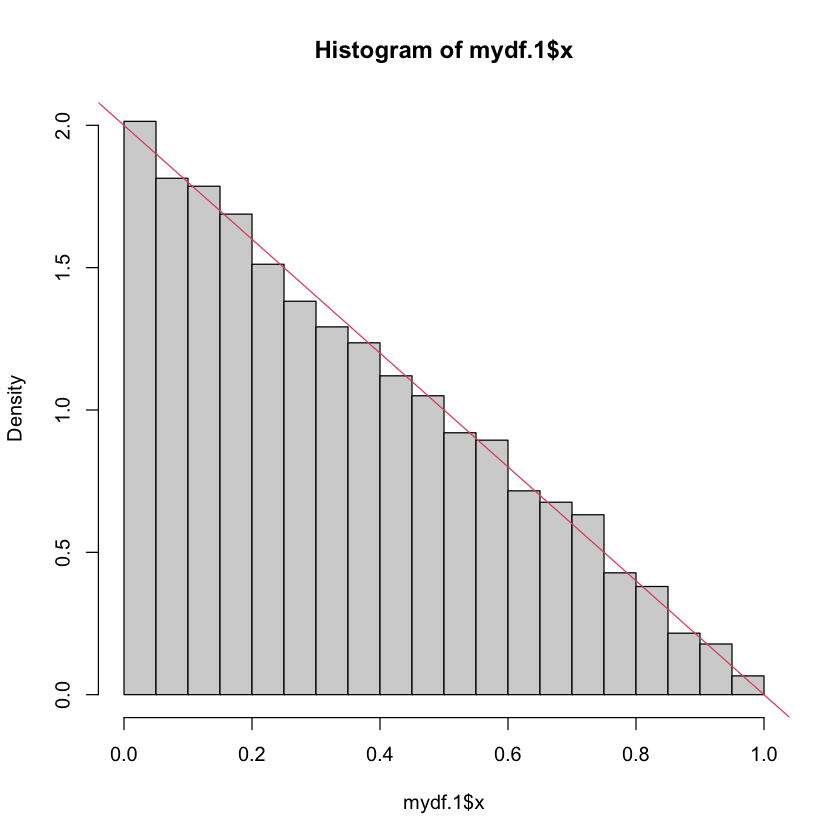

In [33]:
hist(mydf.1$x, prob = T)
abline(a = 2, b = -2, col = 2) 

It shows the straight-line shape that is predicted by theory, $ 2-2x$

d. marginal distribution of Y

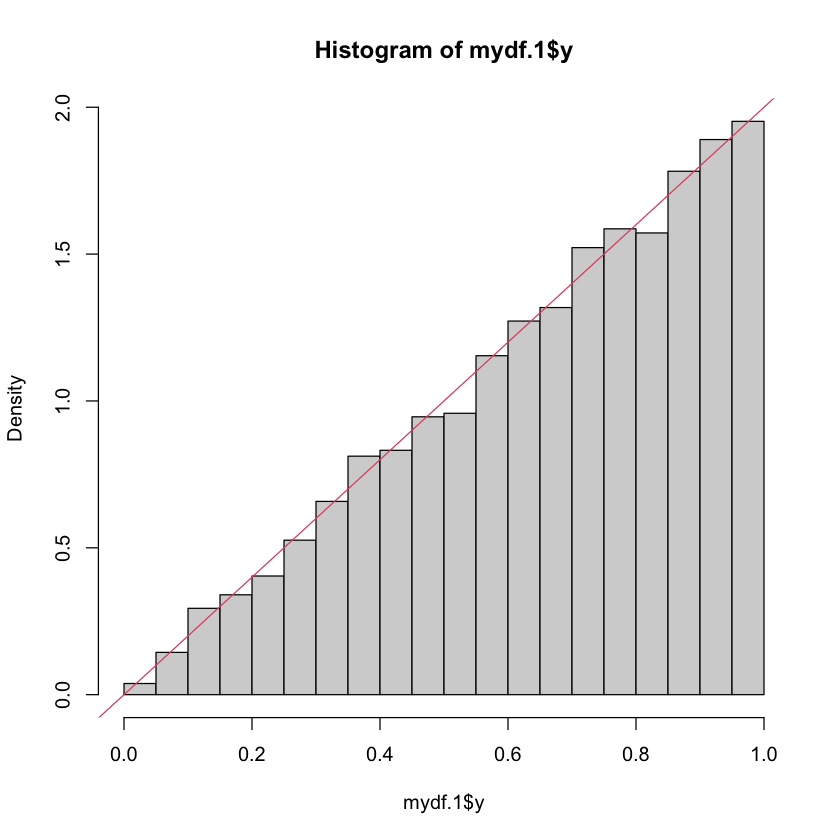

In [34]:
hist(mydf.1$y, prob = T)
abline(a = 0, b = 2, col = 2) 

<!-- # Past Exam Question: Joint distributions and Conditional Expectations.

A pdf is defined by 

$$
\begin{aligned}
f(x,y) &= \begin{cases} C(x+2y) \quad (0<y<1, 0<x<2)\\
0 \quad (otherwise) 
\end{cases}
\end{aligned}
$$

a. Find the value of $C$.

b. Find the Marginal density of $X$

c. Find the Marginal density of $Y$

d. Find the conditional density function of of $Y|X=x$

e. Find the Conditional expectation $E(Y|X)$ -->
